uvod

tabela s podatki

In [90]:
import pandas as pd

RECEPTI = pd.read_csv('recepti.csv')
RECEPTI

,Ime,Kategorija,Težavnost,Čas (min),Hranilna vrednost (kcal/100g),Koraki,Sestavine,Opis,Dolžina opisa (besede),Dolzina opisa (črke)
0,Slivovi cmoki iz skutnega testa,Slovenska,2,60,332,4,8,S slivami nadevani cmočki iz rahlega skutnega ...,23,127
1,Pirina solata z zelenjavo in mocarelo,Brez mesa,1,40,118,4,13,"Lahka in barvita jed, ki ne vsebuje mesa in je...",33,163
2,Turška umešana jajca z zelenjavo (menemen),Jajčne jedi,1,30,62,5,8,Menemen je nekakšna turška različica sataraša....,60,321
3,Paprike z mletim mesom in rižem iz ene ponve,Glavne jedi,1,45,131,6,13,"Ko ne boste imeli časa ali volje, da bi se lot...",33,162
4,Pikantne polnjene paprike s tuno in kaprami,Domači pripravki,1,75,84,9,11,"Poletje se počasi končuje, z njim pa je poveza...",72,375
...,...,...,...,...,...,...,...,...,...,...
2974,New York cheesecake,Kuhinje,2,70,378,6,12,Cheesecake (po naše tudi sirova torta) prvotno...,58,315
2975,Piščanec po maroško z marelicami in mandlji,Kuhinje,1,87,204,5,16,Za maroško kuhinjo so značilne močne začimbe i...,52,277
2976,Rigatoni z mesnimi kroglicami v paradižnikovi ...,Italijanska,2,45,212,5,18,Krožnike boste zagotovo pomazali do zadnje kap...,7,46
2977,Srčni krofki,Pust,2,118,374,6,12,"Kako lahko rešimo dilemo, ko sta valentinovo i...",44,218


Oglejmo si, katerih 10 kategorij je pri receptih najbolj pogostih.

In [91]:
po_kategorijah = RECEPTI.groupby(by= 'Kategorija').size()
po_kategorijah.sort_values(ascending=False, inplace=True)
po_kategorijah.head(10)

Kategorija
MasterChef               457
Sladice                  450
Zdravo in vegi           163
Zabava                   150
Kosilo                   141
Moja mama kuha bolje!    133
Slovenska                 95
Božič in novo leto        83
Na hitro                  82
Jesen                     81
dtype: int64

Zanimalo nas je, kakšno je razmerje med recepti posameznih težavnosti.

<Axes: >

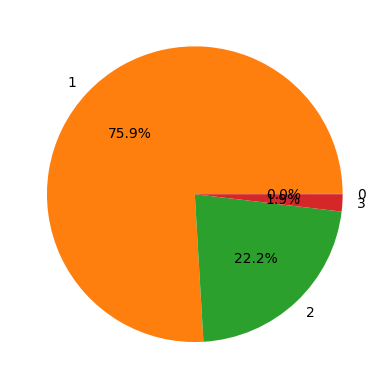

In [92]:
RECEPTI.groupby(by= 'Težavnost').size().plot.pie(autopct='%1.1f%%')

Očitno na portalu prevladujejo enostavni recepti, zato korelacij med recepti glede na njihovo težavnost nismo iskali.

Spodnji diagram prikazuje, koliko receptov vsebuje določeno število sestavin.

<Axes: xlabel='Sestavine', ylabel='Št. receptov'>

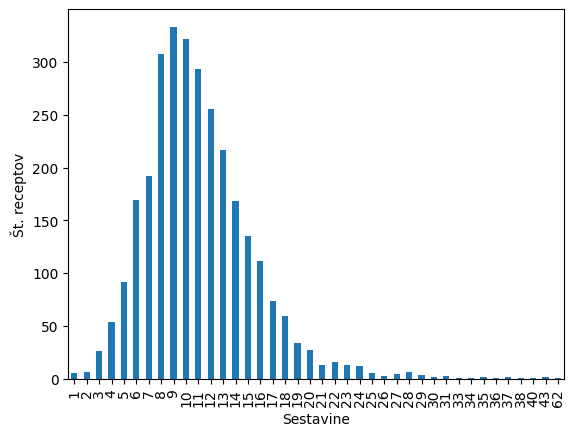

In [93]:
po_sestavinah = RECEPTI.groupby(by= 'Sestavine').size()
po_sestavinah.plot.bar(ylabel= 'Št. receptov')

<Axes: xlabel='Sestavine', ylabel='Čas (min)'>

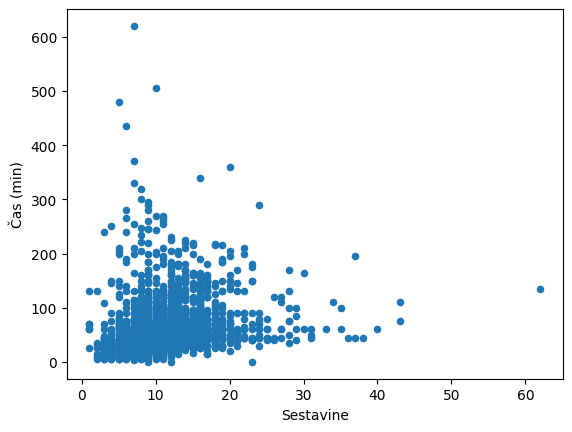

In [94]:
RECEPTI.plot.scatter('Sestavine', 'Čas (min)')

vaaauuuuu


In [112]:
RECEPTI.sort_values(by= 'Sestavine', ascending=False, inplace=True)
RECEPTI.head(1)

,Ime,Kategorija,Težavnost,Čas (min),Hranilna vrednost (kcal/100g),Koraki,Sestavine,Opis,Dolžina opisa (besede),Dolzina opisa (črke),Časovni intervali (min),Hranilna vrednost intervali
1062,Telečja pečenka z devetimi prilogami,MasterChef,2,135,127,14,62,"Telečja pečenka s praženim krompirjem, koromač...",57,346,>90,125


Oglejmo si, koliko časa potrebujemo za recepte.
V tortnem diagramu so časi združeni v 15-minutnih kategorijah, kjer spodnja meja ni vključena, zgornja pa je.

In [ ]:
RECEPTI.sort_values(by= 'Čas (min)', ascending=False, inplace=True)
RECEPTI.head(1)

<Axes: >

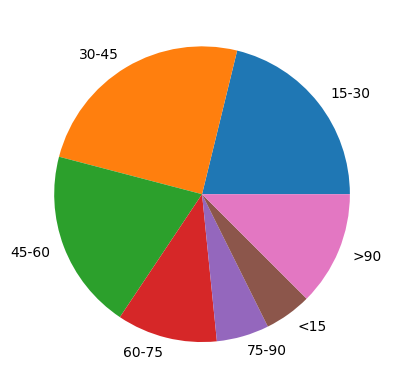

In [95]:
from pomozne_funkcije import zdruzi_po_casu

RECEPTI['Časovni intervali (min)'] = RECEPTI['Čas (min)'].map(zdruzi_po_casu)
RECEPTI.groupby(by= 'Časovni intervali (min)').size().plot.pie()


<Axes: xlabel='Hranilna vrednost (kcal/100g)', ylabel='Št. receptov'>

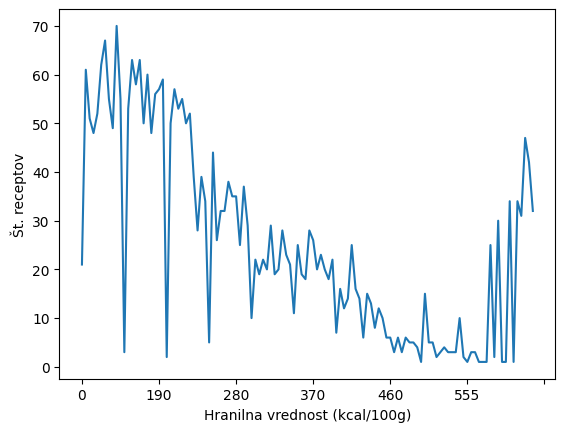

In [96]:
from pomozne_funkcije import zdruzi_po_kcal

RECEPTI['Hranilna vrednost intervali'] = RECEPTI['Hranilna vrednost (kcal/100g)'].map(zdruzi_po_kcal)
po_hranilni_vrednosti = RECEPTI.groupby(by= 'Hranilna vrednost intervali').size()
po_hranilni_vrednosti.plot.line(xlabel= 'Hranilna vrednost (kcal/100g)', ylabel= 'Št. receptov')

Zanimalo nas je tudi, kako dolge opise receptov pišejo uporabniki spletnega portala. Oglejmo si najprej, ali se dolžini opisa glede na število besed in črk razlikujeta.

<Axes: xlabel='Dolžina opisa (besede)', ylabel='Dolzina opisa (črke)'>

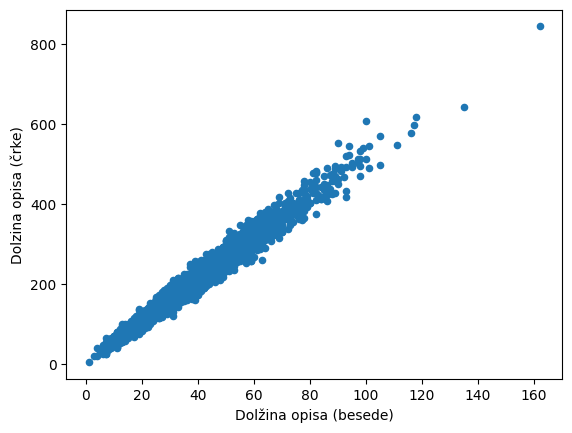

In [97]:
RECEPTI.plot.scatter('Dolžina opisa (besede)', 'Dolžina opisa (črke)')

Kot pričakovano posebnih odstopanj ni. Zanimalo pa nas je tudi, ali so uporabniki, ki so pisali najdaljše opise, tudi recept razdelili na največ korakov.

<Axes: xlabel='Dolžina opisa (besede)', ylabel='Koraki'>

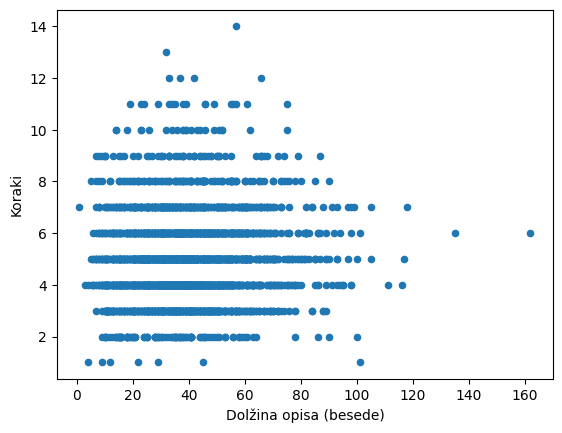

In [98]:
RECEPTI.plot.scatter('Dolžina opisa (besede)', 'Koraki')

Kljub našim ugibanjem očitne koralacije ni bilo.

Za konec si oglejmo, pri katerih receptih so se uporabniki pri pisanju opisov najbolj razgovorili ...

In [106]:
RECEPTI.sort_values(by= 'Dolžina opisa (besede)', ascending=False, inplace=True)
tabela = RECEPTI[['Ime', 'Opis', 'Dolžina opisa (besede)']]
tabela.head(10)

,Ime,Opis,Dolžina opisa (besede)
2069,Veganska potica z rožičem,Potica je gotovo najbolj znana in najbolj razš...,162
1320,Orehova potica z drožmi,V knjigi Potice iz Slovnije prof. dr. Janez Bo...,135
509,Pica polžki iz kvašenega testa,Pico imamo vsi radi že zaradi neštetih možnost...,118
1673,Veganski bananini krofi,Veganski bananini krofi s čokoladnim oblivom s...,117
1100,Francoski topli sendvič croque monsieur,"Legenda pravi, da je sendvič nastal tako, da j...",116
1677,Testenine z zeleno omako,"Super zelene testenine, ki so na jedilniku sko...",111
363,Belgijski vaflji,"Vaflji so odlična izbira za tiste dni, ko se ž...",105
94,Babičino pecivo s sadjem,Naše mame in babice so bile v kuhnji prave moj...,105
1947,Okusen smoothie iz rdeče pese,Smoothiji postajajo nepogrešljiv del marsikate...,101
53,Vložena zelenjava,"Obilje vrtnih pridelkov nas prav sili, da del ...",101


... in pri katerih najmanj.

In [105]:
tabela.tail(10)

,Ime,Opis,Dolžina opisa (besede)
279,Košarice z jabolki in rumovo kremo z belo čoko...,Čudovito pecivo za praznovanja in zabave.,6
956,Ingverjeva limonada z meto,Prava osvežitev za vroče poletne dni.,6
811,Piščanec po špansko z belim fižolom,"Španci že vedo, kaj je dobro!",6
2611,Pečeni parklji,Ni Miklavža brez (pečenih) parkljev!,5
180,Rižota s pikantno papriko in korenjem,Odlična priloga zrezkom v omaki.,5
1375,Kvašene miške z rozinami in orehi,Z užitkom jih boste pohrustali!,5
1551,Hren s kislo smetano,Nepogrešljiva priloga velikonočne pojedine.,4
2679,"Pečene krompirjeve polovičke s slanino, sirom ...",To je nekaj najboljšega!,4
2115,Ribji fileji v hrustljavi srajčki,Zdrava 'pohana' ribica.,3
2447,"Steak s pikantno omako, zelenjavno in sadno pr...",aaaa,1
